# Data Cleaning and preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
data = pd.read_csv("DataAnalyst_Assesment_Dataset.csv")
data.head()

,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Subscription Type,Service Name,Service Type,Customer Email,Customer Phone
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,30-05-2025,Pending,NaN,NaN,10:00,90.0,42.74,Party Room,NaN,NaN,Party Room,Facility,customer1@example.com,001-730-9034
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,29-05-2025,Pending,NaN,NaN,NaN,NaN,182.06,Party Room,Superhero,NaN,Party Room,Birthday Party,customer2@example.com,001-537-5668
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,09-05-2025,Confirmed,NaN,NaN,11:00,120.0,207.50,Play Area,NaN,NaN,Play Area,Facility,customer3@example.com,001-880-7769
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,07-06-2025,Pending,NaN,NaN,12:00,90.0,203.20,Play Area,NaN,NaN,Play Area,Birthday Party,customer4@example.com,001-491-3107
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,13-04-2025,Pending,Art,NaN,15:00,120.0,161.14,NaN,NaN,NaN,Art,Class,customer5@example.com,001-718-3794


In [3]:
data.shape

(1000, 18)

In [4]:
#removing whotespaces if any 
data.columns = data.columns.str.strip()

In [5]:
#dataset information
def dataset_analysis(data):
    print('\n DATASET INFORMATION')
    print("--------------------")
    data.info()
    print("\n MISSING VALUES")
    print("--------------------")
    print(data.isnull().sum())

dataset_analysis(data)


 DATASET INFORMATION
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Booking ID         1000 non-null   object 
 1   Customer ID        1000 non-null   object 
 2   Customer Name      1000 non-null   object 
 3   Booking Type       1000 non-null   object 
 4   Booking Date       1000 non-null   object 
 5   Status             1000 non-null   object 
 6   Class Type         328 non-null    object 
 7   Instructor         270 non-null    object 
 8   Time Slot          795 non-null    object 
 9   Duration (mins)    795 non-null    float64
 10  Price              1000 non-null   float64
 11  Facility           672 non-null    object 
 12  Theme              273 non-null    object 
 13  Subscription Type  0 non-null      float64
 14  Service Name       1000 non-null   object 
 15  Service Type       1000 non-nu

In [6]:
#Dropping Subscription Type as it has no values
data.drop(columns=["Subscription Type"],inplace=True)

In [7]:
#changing the Data Type
data['Time Slot'] = pd.to_datetime(data['Time Slot'], format='%H:%M', errors='coerce').dt.time

In [8]:
data['Booking Date'] = pd.to_datetime(data['Booking Date'])

C:\Users\alito\AppData\Local\Temp\ipykernel_18484\1238586728.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Booking Date'] = pd.to_datetime(data['Booking Date'])


In [9]:
#Handling missing values
data["Time Slot"].fillna(method="ffill",inplace=True)

C:\Users\alito\AppData\Local\Temp\ipykernel_18484\2417616968.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Time Slot"].fillna(method="ffill",inplace=True)


In [10]:
for i in data.select_dtypes(include="object").columns:
    data[i].fillna(method="ffill",inplace=True)

C:\Users\alito\AppData\Local\Temp\ipykernel_18484\1647733863.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[i].fillna(method="ffill",inplace=True)


In [11]:
data["Instructor"].fillna(method="bfill",inplace=True)

C:\Users\alito\AppData\Local\Temp\ipykernel_18484\766317803.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Instructor"].fillna(method="bfill",inplace=True)


In [12]:
data["Class Type"].fillna(method="bfill",inplace=True)

C:\Users\alito\AppData\Local\Temp\ipykernel_18484\4114269165.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Class Type"].fillna(method="bfill",inplace=True)


In [13]:
data["Theme"].fillna(method="bfill",inplace=True)

C:\Users\alito\AppData\Local\Temp\ipykernel_18484\939881643.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Theme"].fillna(method="bfill",inplace=True)


In [14]:
# for i in data.select_dtypes(include="object").columns:
#     data[i].fillna(data[i].mode()[0],inplace=True)

In [15]:
data["Duration (mins)"].fillna(data["Duration (mins)"].median(),inplace=True)

In [16]:
#checking duplicates if any
data.duplicated().sum()
# data.drop_duplicates(inplace=True)

0

# EXPLORATORY DATA ANALYSIS(EDA)

### Univariate Analysis

#### Non-Visual

In [18]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("\n")
        print("*"*10,col_name,"*"*10)
        print(numerical_data[col_name].agg(["min","max","mean","median","std","skew","kurt"]))

numerical_univariate_analysis(data[["Duration (mins)","Price"]])



********** Duration (mins) **********
min        45.000000
max       120.000000
mean       85.560000
median     90.000000
std        27.181340
skew       -0.371698
kurt       -1.046889
Name: Duration (mins), dtype: float64


********** Price **********
min         0.000000
max       299.760000
mean      139.477210
median    137.355000
std        92.239835
skew        0.024308
kurt       -1.218772
Name: Price, dtype: float64


#### Visual

C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


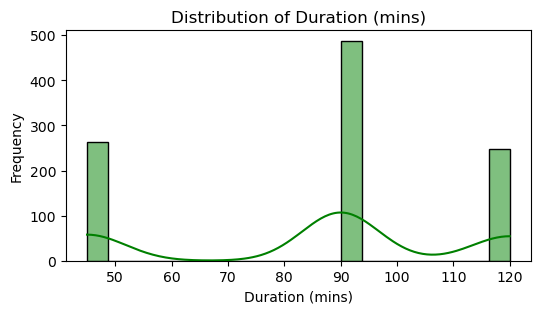

In [19]:
# Distribution of Duration(mins)
plt.figure(figsize=(6,3))
sns.histplot(data["Duration (mins)"],bins=20,kde=True,color="green")
plt.title("Distribution of Duration (mins)")
plt.xlabel("Duration (mins)")
plt.ylabel("Frequency")
plt.show()

C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


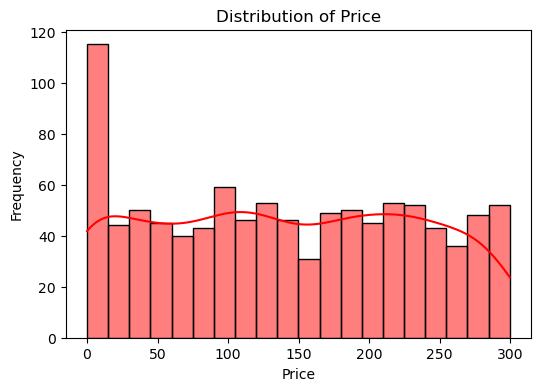

In [20]:
#Price Distribution
plt.figure(figsize=(6,4))
sns.histplot(data["Price"],bins=20,kde=True,color='red')
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

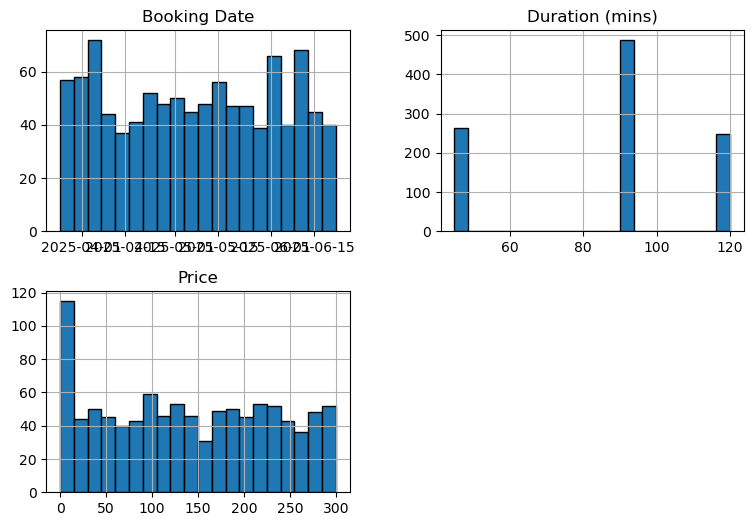

In [21]:
data.hist(figsize=(9,6),bins=20,edgecolor='black')
plt.show()

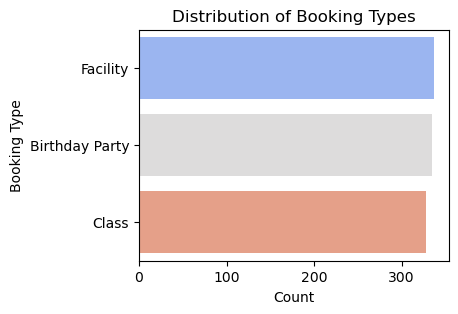

In [22]:
plt.figure(figsize=(4,3))
sns.countplot(data=data, y="Booking Type", order=data["Booking Type"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Booking Types")
plt.xlabel("Count")
plt.ylabel("Booking Type")
plt.show()

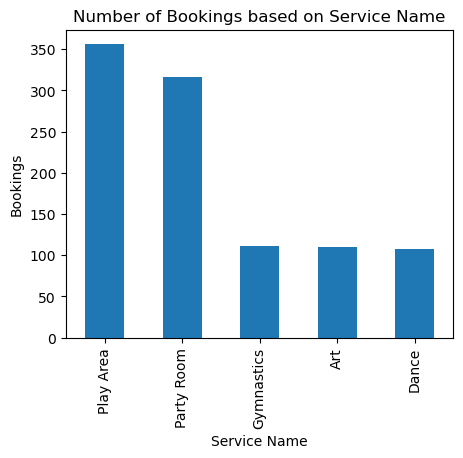

In [26]:
plt.figure(figsize=(5,4))
data["Service Name"].value_counts().plot(kind="bar")
plt.title("Number of Bookings based on Service Name")
plt.xlabel("Service Name")
plt.ylabel("Bookings")
plt.show()

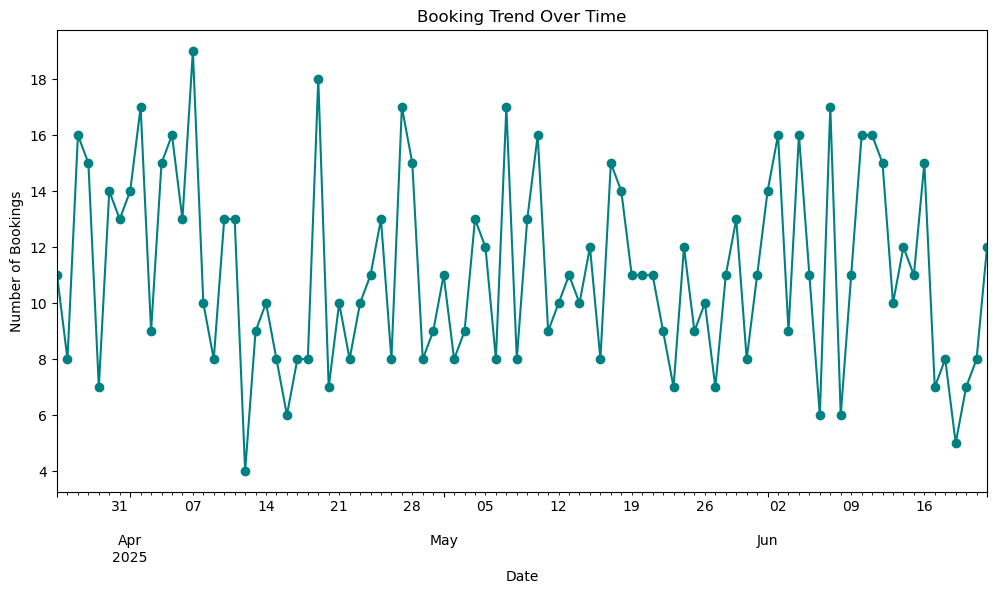

In [24]:
# Booking over Time
plt.figure(figsize=(12, 6))
data["Booking Date"].value_counts().sort_index().plot(marker="o", color="teal", linestyle="-")
plt.title("Booking Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.show()

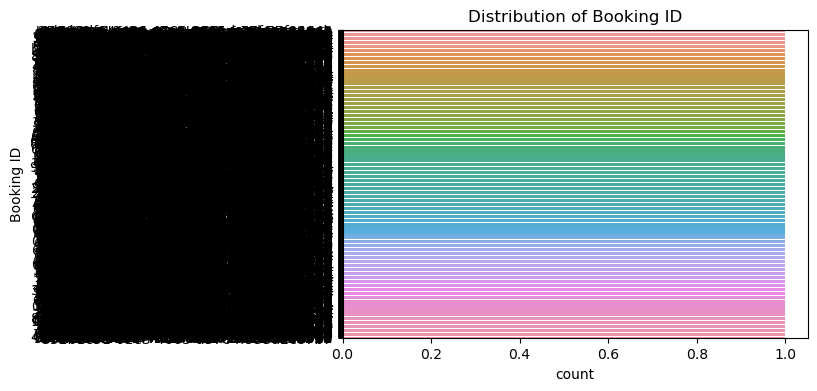

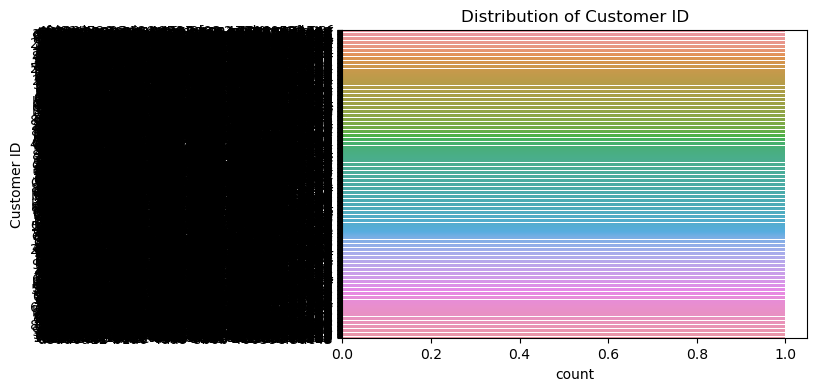

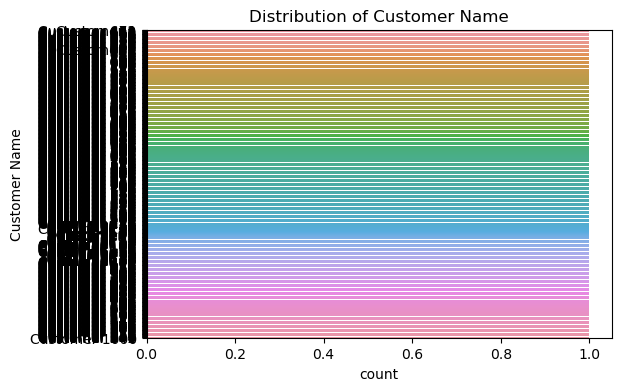

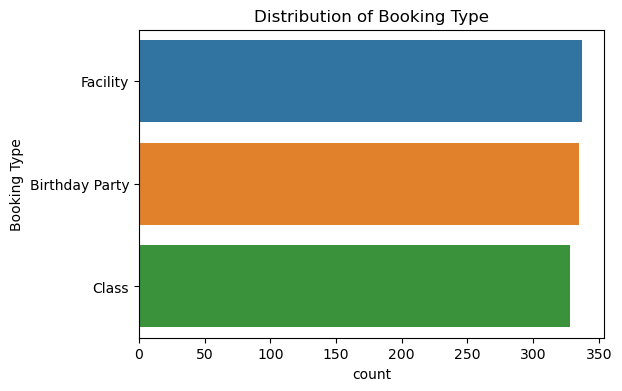

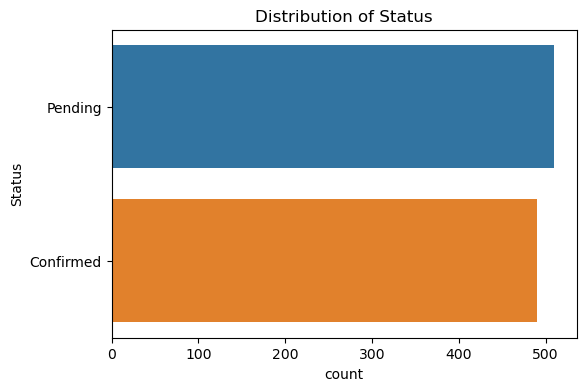

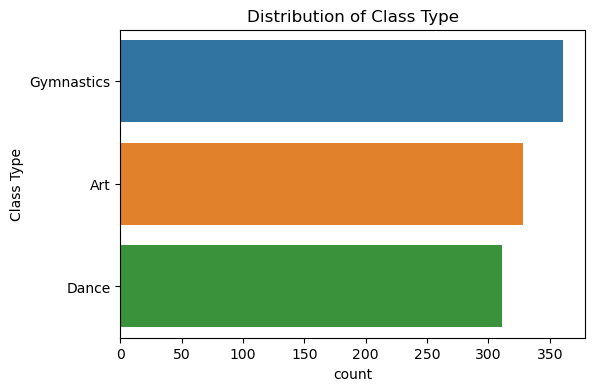

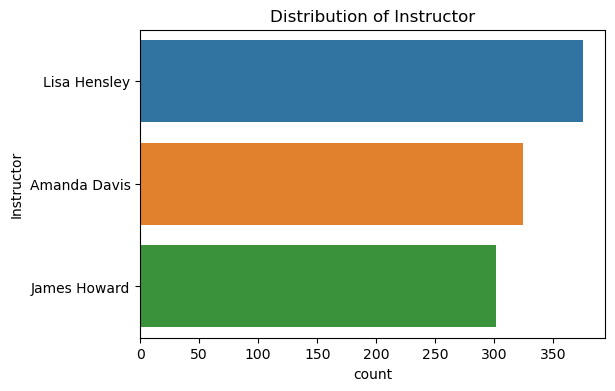

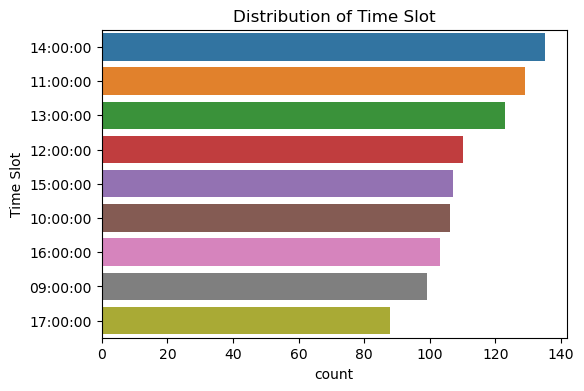

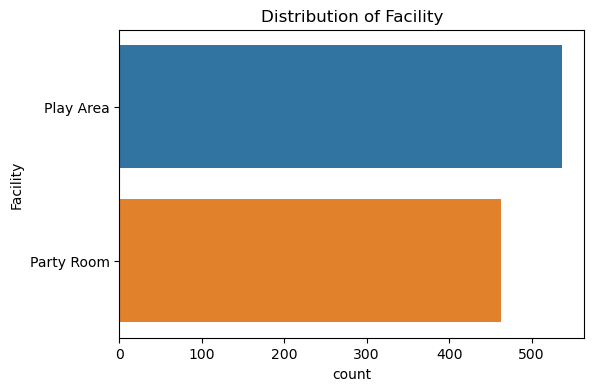

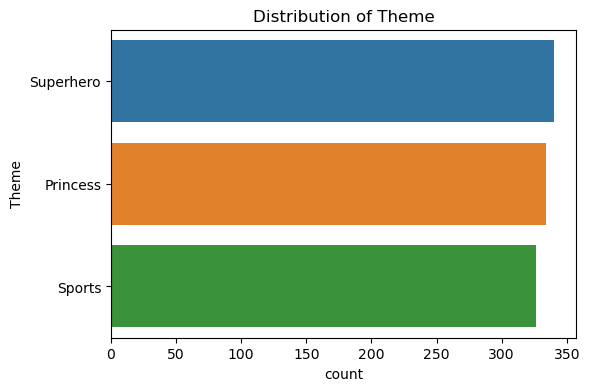

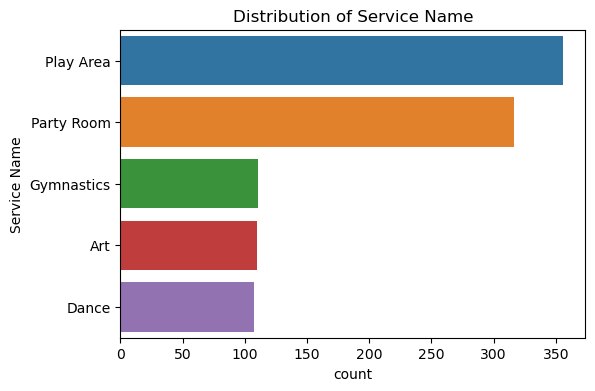

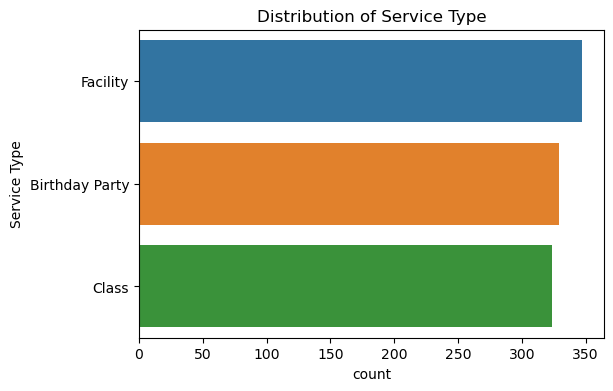

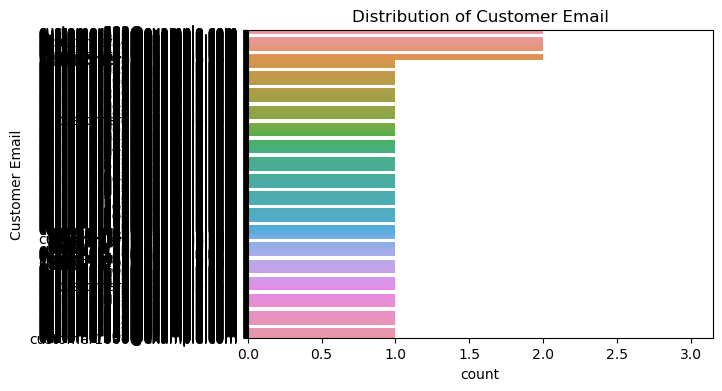

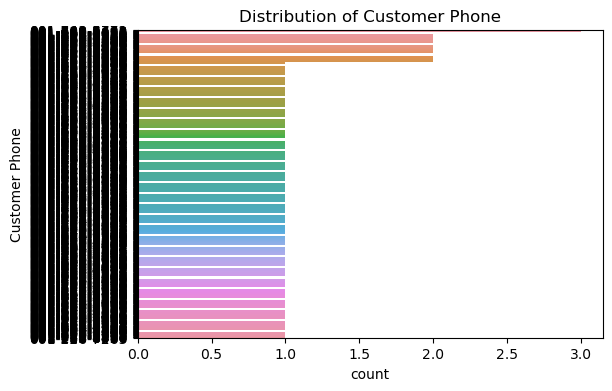

In [25]:
# Count plots for categorical columns
for col in data.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, y=col, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

### Bivariate Analysis

#### Non-Visual

In [28]:
#cross tab
tab = pd.crosstab(data["Service Type"],data["Time Slot"],normalize = "index")
tab

Time Slot,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00
Service Type,,,,,,,,,
Birthday Party,0.103343,0.094225,0.109422,0.130699,0.100304,0.142857,0.118541,0.109422,0.091185
Class,0.086420,0.126543,0.123457,0.117284,0.154321,0.123457,0.086420,0.101852,0.080247
Facility,0.106628,0.097983,0.152738,0.083573,0.115274,0.138329,0.115274,0.097983,0.092219


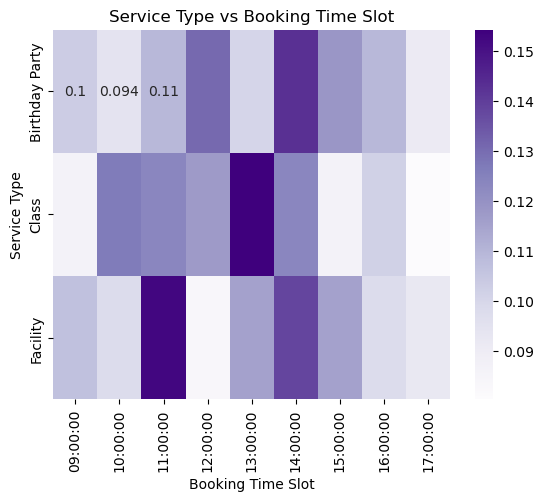

In [29]:
sns.heatmap(tab, annot=True, cmap="Purples")
plt.title("Service Type vs Booking Time Slot")
plt.xlabel("Booking Time Slot")
plt.ylabel("Service Type")
plt.show()

In [30]:
tab1 = pd.crosstab(data["Service Name"],data["Service Type"],normalize = "index")
tab1

Service Type,Birthday Party,Class,Facility
Service Name,,,
Art,0.172727,0.690909,0.136364
Dance,0.140187,0.644860,0.214953
Gymnastics,0.162162,0.648649,0.189189
Party Room,0.420886,0.174051,0.405063
Play Area,0.404494,0.146067,0.449438


<Axes: ylabel='Service Name'>

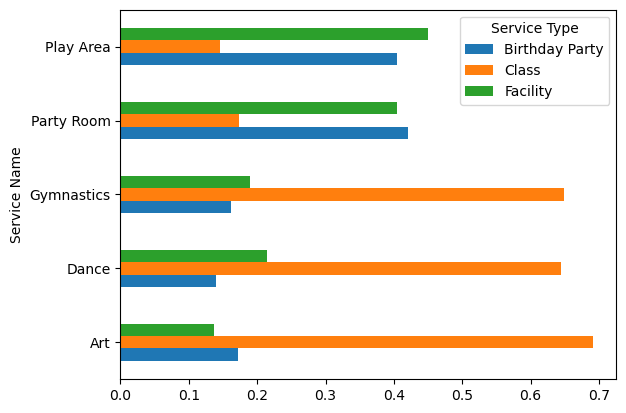

In [31]:
tab1.plot(kind="barh")

#### Visual

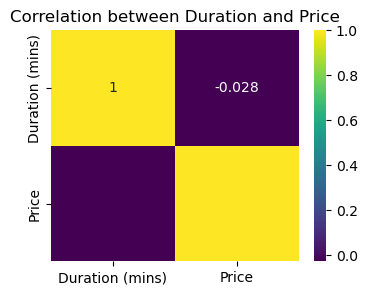

In [32]:
# Computing correlation using HeatMap
plt.figure(figsize=(4,3))
sns.heatmap(data[["Duration (mins)","Price"]].corr(numeric_only=True),annot=True, cmap="viridis")
plt.title("Correlation between Duration and Price")
plt.show()

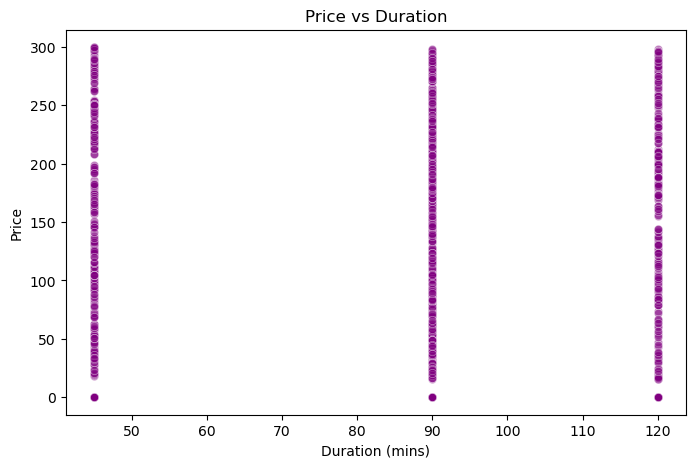

In [33]:
# ScatterPlot Price vs Duration
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Duration (mins)"], y=data["Price"], color="purple", alpha=0.5)
plt.title("Price vs Duration")
plt.xlabel("Duration (mins)")
plt.ylabel("Price")
plt.show()

Text(0.5, 1.0, 'Class Type vs Duration')

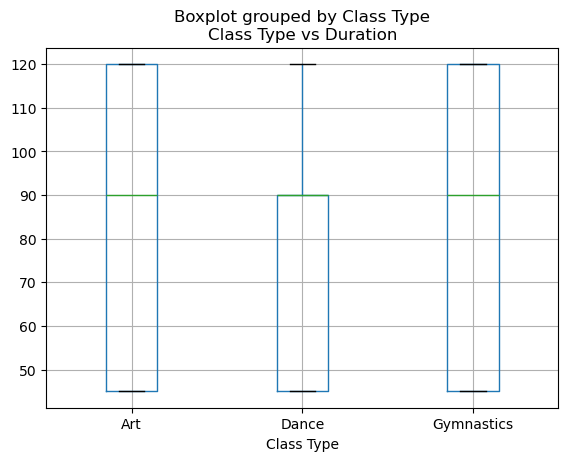

In [34]:
data.boxplot(by="Class Type",column="Duration (mins)")
plt.title("Class Type vs Duration")

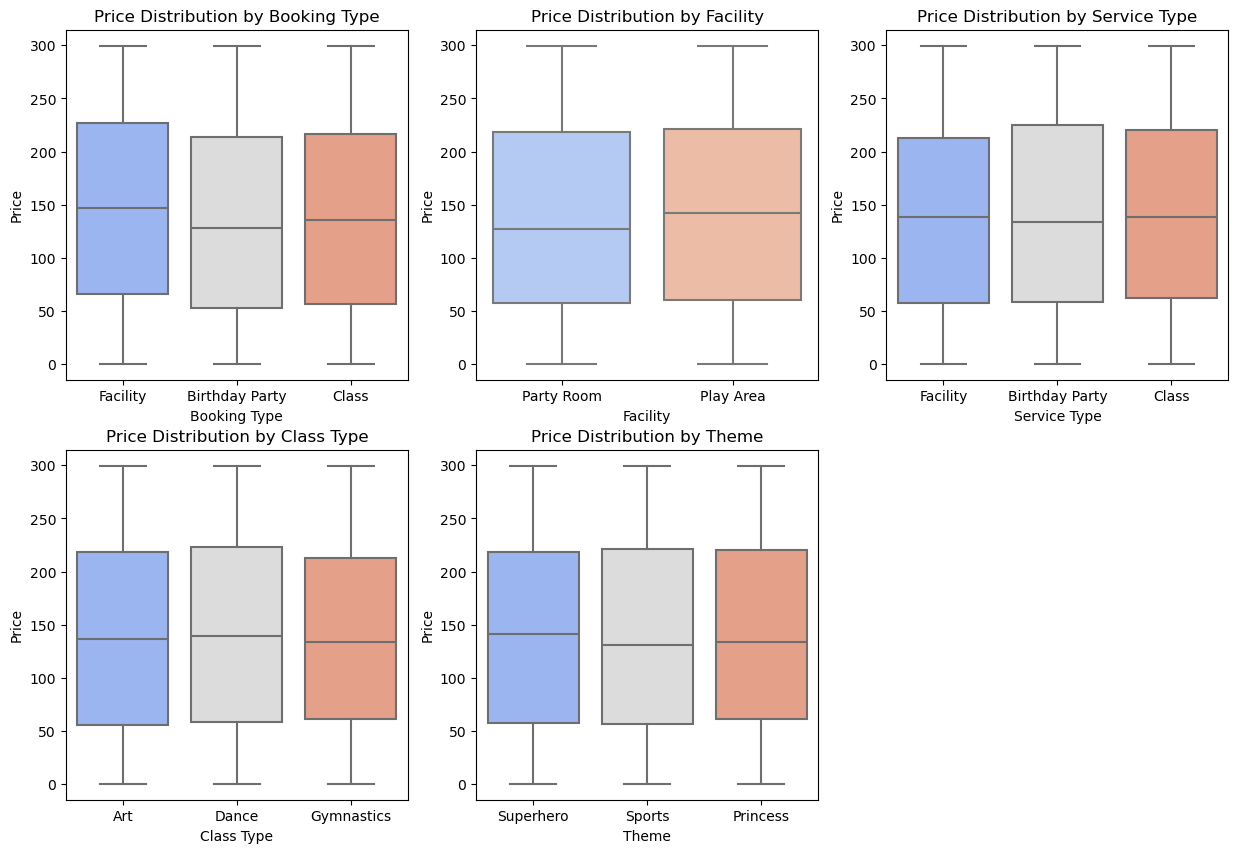

In [35]:
cat_f = ["Booking Type", "Facility", "Service Type", "Class Type", "Theme"]

plt.figure(figsize=(15, 10))
for i, var in enumerate(cat_f, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x=var, y="Price", palette="coolwarm")
    plt.title(f"Price Distribution by {var}")
    
plt.show()


# FEATURE ENGINEERING

In [36]:
if "Booking Date" in data.columns:
    data["Days(Week)"] = data["Booking Date"].dt.day_name()
    data["Month"] = data["Booking Date"].dt.month

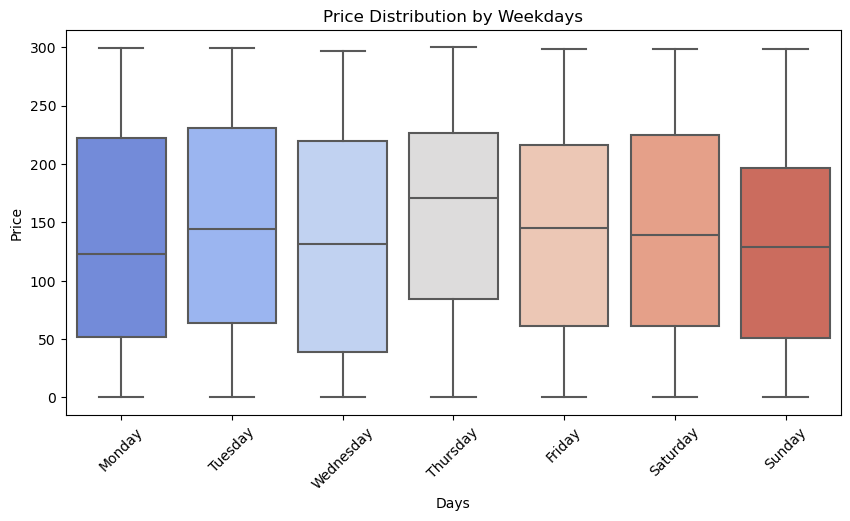

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot( data=data,x="Days(Week)",y="Price",order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], palette="coolwarm")
plt.title("Price Distribution by Weekdays")
plt.xlabel("Days")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [126]:
if "Price" in data.columns:
    mid_price = data["Price"].median()
    data["Premium_Service"] = (data["Price"] > mid_price).astype(int)

In [127]:
#saving the cleaned dataset into csv and excel format
data.to_csv("final_dataset.csv", index=False)
data.to_excel("final_dataset1.xlsx", index=False)